In [1]:
import os
import json
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
root = 'Training'

In [3]:
annot_path = f'{root}/Annotations/all'
img_path = f'{root}/Images/all'

In [4]:
annots = os.listdir(annot_path)
imgs = os.listdir(img_path)

In [5]:
Annots = [a[:-10] for a in annots]
Imgs = [i[:-4] for i in imgs]

In [6]:
len(Annots), len(Imgs)

(57923, 57941)

In [7]:
cor = 0
val = []
for i, a in enumerate(Annots):
    print(f'\r ({i}/{len(Annots)})', end='')
    if a in Imgs:
        cor += 1
        val.append(a)

 (2449/57923)

 (4360/57923)

 (5841/57923)

 (7117/57923)

 (8280/57923)

 (9235/57923)

 (10135/57923)

 (11013/57923)

 (11860/57923)

 (12670/57923)

 (13582/57923)

 (14308/57923)

 (15041/57923)

 (15767/57923)

 (16406/57923)

 (17010/57923)

 (17606/57923)

 (18268/57923)

 (18935/57923)

 (19502/57923)

 (20071/57923)

 (57922/57923)

In [8]:
print(cor, len(val))

57923 57923


In [23]:
pots = []
fill = []
for i, v in enumerate(val):
    print(f'\r ({i}/{len(val)})', end='')
    P, F = 0, 0
    JSON = v + '_BBOX.json'
    json_path = annot_path + '/' + JSON
    with open(json_path) as f:
        instances = json.load(f)
    annots = instances['annotations']
    for a in annots:
        category_id = a['category_id']
        if category_id == 8:
            P += 1
        elif category_id == 9:
            F += 1
    if P > 0 and F > 0:
        pass
    elif P > 0 and F == 0:
        pots.append(v)
    elif P == 0 and F > 0:
        fill.append(v)
    else:
        pass

 (73457/73458)

In [48]:
pots = []
fill = []
stones = []
for i, v in enumerate(val):
    print(f'\r ({i}/{len(val)})', end='')
    P, F = 0, 0
    S = 0
    JSON = v + '_BBOX.json'
    json_path = annot_path + '/' + JSON
    with open(json_path) as f:
        instances = json.load(f)
    annots = instances['annotations']
    for a in annots:
        category_id = a['category_id']
        if category_id == 7:
            S += 1
        elif category_id == 8:
            P += 1
        elif category_id == 9:
            F += 1
    if S > 0:
        if P == 0 and F == 0:
            stones.append(v)

 (57922/57923)

In [49]:
len(pots), len(fill)

(0, 0)

In [50]:
len(stones)

8911

In [25]:
pot_annot_path = f'{root}/pothole/annots'
pot_img_path = f'{root}/pothole/imgs'

val_annot_path = f'{root}/annots'
val_img_path = f'{root}/imgs'
for i, p in enumerate(pots):
    print(f'\r ({i}/{len(pots)})', end='')
    JSON = p + '_BBOX.json'
    IMAGE = p + '.png'
    
    json_src = annot_path + '/' + JSON
    json_dst = pot_annot_path + '/' + JSON
    shutil.copy(json_src, json_dst)
    
    img_src = img_path + '/' + IMAGE
    img_dst = pot_img_path + '/' + IMAGE
    shutil.copy(img_src, img_dst)

 (3547/3548)

In [26]:
fill_annot_path = f'{root}/filled/annots'
fill_img_path = f'{root}/filled/imgs'

val_annot_path = f'{root}/annots'
val_img_path = f'{root}/imgs'
for i, p in enumerate(fill):
    print(f'\r ({i}/{len(fill)})', end='')
    JSON = p + '_BBOX.json'
    IMAGE = p + '.png'
    
    json_src = annot_path + '/' + JSON
    json_dst = fill_annot_path + '/' + JSON
    shutil.copy(json_src, json_dst)
    
    img_src = img_path + '/' + IMAGE
    img_dst = fill_img_path + '/' + IMAGE
    shutil.copy(img_src, img_dst)

 (2906/2907)

In [51]:
stone_annot_path = f'{root}/stone/annots'
stone_img_path = f'{root}/stone/imgs'

val_annot_path = f'{root}/annots'
val_img_path = f'{root}/imgs'
for i, p in enumerate(stones):
    print(f'\r ({i}/{len(stones)})', end='')
    JSON = p + '_BBOX.json'
    IMAGE = p + '.png'
    
    json_src = annot_path + '/' + JSON
    json_dst = stone_annot_path + '/' + JSON
    shutil.copy(json_src, json_dst)
    
    img_src = img_path + '/' + IMAGE
    img_dst = stone_img_path + '/' + IMAGE
    shutil.copy(img_src, img_dst)

 (8910/8911)

In [27]:
# annot_path = 'Validation/Annotations/all/V0F_HY_0076_20210115_101116_E_CH2_Busan_Sun_Mainroad_Day_46044_BBOX.json'
# img_path = 'Validation/Images/all/V0F_HY_0076_20210115_101116_E_CH2_Busan_Sun_Mainroad_Day_46044.png'

In [79]:
imgs = os.listdir(val_img_path)
imgs[0]

'V0B_HY_0113_20210108_084834_N_CH2_Busan_Sun_Mainroad_Day_19765.png'

In [52]:
val_annot_path = 'Training/stone/annots'

In [53]:
annots = os.listdir(val_annot_path)
annots[0], len(annots)

('V0B_HY_0707_20210108_093937_N_CH0_Busan_Sun_Mainroad_Day_40085_BBOX.json',
 8911)

In [54]:
with open(f'{val_annot_path}/{annots[0]}') as f:
    instances = json.load(f)

In [55]:
categories = instances['categories']
categories

[{'id': 1, 'name': 'Animals(Dolls)'},
 {'id': 2, 'name': 'Person'},
 {'id': 3, 'name': 'Garbage bag & sacks'},
 {'id': 4, 'name': 'Construction signs & Parking prohibited board'},
 {'id': 5, 'name': 'Traffic cone'},
 {'id': 6, 'name': 'Box'},
 {'id': 7, 'name': 'Stones on road'},
 {'id': 8, 'name': 'Pothole on road'},
 {'id': 9, 'name': 'Filled pothole'},
 {'id': 10, 'name': 'Manhole'}]

In [56]:
instances['annotations']

[{'segmentation': [],
  'polyline': [],
  'image_id': 1,
  'bbox': [195.5, 268.5, 157, 21],
  'category_id': 10,
  'area': 3297,
  'is_crowd': 0,
  'id': 1},
 {'segmentation': [],
  'polyline': [],
  'image_id': 1,
  'bbox': [763.5, 351.5, 51, 37],
  'category_id': 7,
  'area': 1887,
  'is_crowd': 0,
  'id': 2}]

In [57]:
instances['annotations'][0]['category_id']

10

In [30]:
# img_open = Image.open(img_path).convert("RGBA")
# draw_layer = Image.new("RGBA", img_open.size, (255, 255, 255, 0))
# draw = ImageDraw.Draw(draw_layer)

SyntaxError: broken PNG file (chunk b'\x00\x00\x00\x00') (<string>)

In [66]:
img_path = 'Training/stone/imgs'
imgs = os.listdir(img_path)

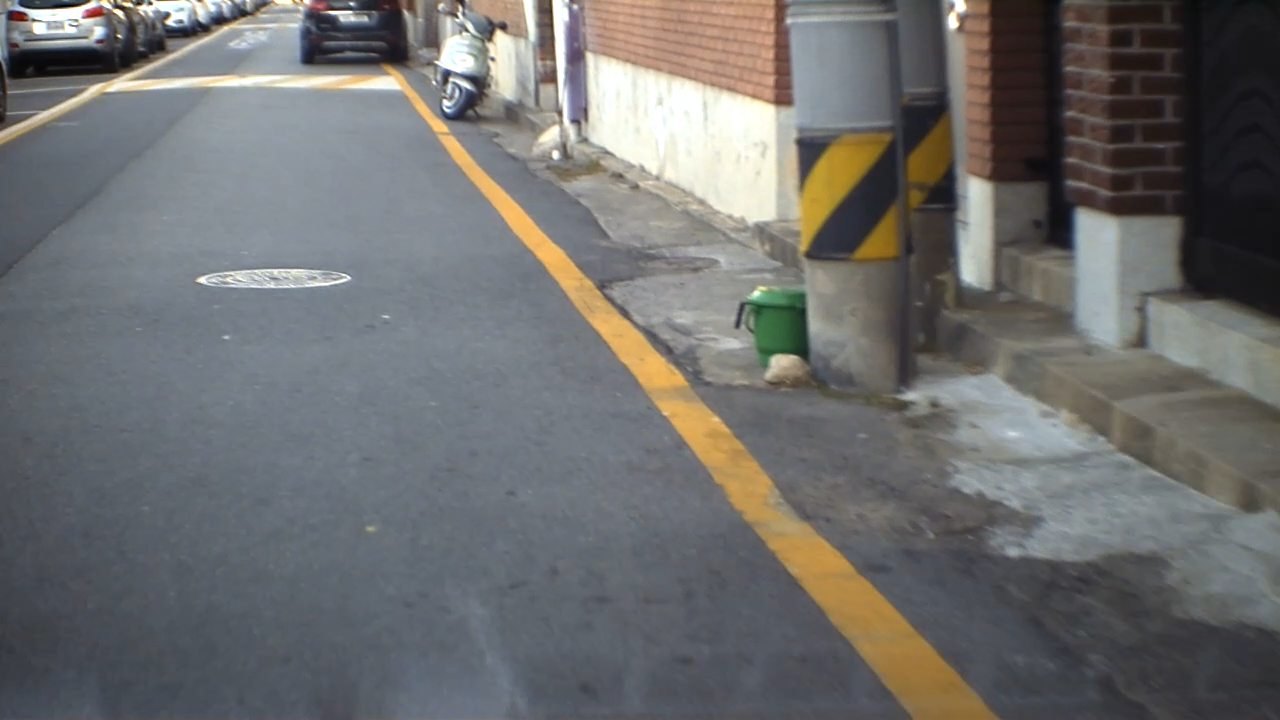

In [67]:
Image.open(f'{img_path}/{imgs[0]}')

[195.5, 268.5, 352.5, 289.5]
[763.5, 351.5, 814.5, 388.5]


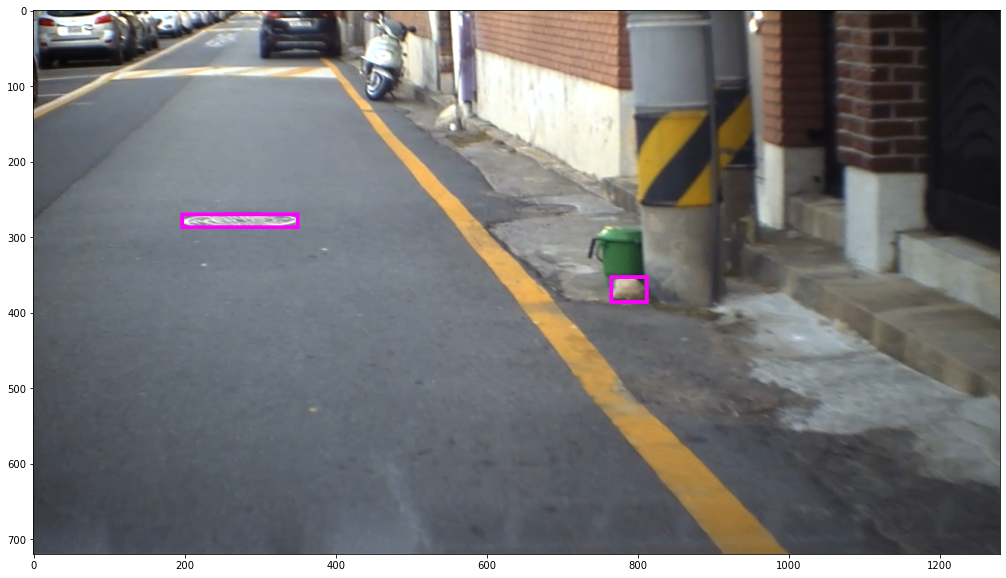

In [68]:
with open(f'{val_annot_path}/{annots[0]}') as f:
    instances = json.load(f)
img_open = Image.open(f'{img_path}/{imgs[0]}').convert("RGBA")

for obj in instances['annotations']:
    bbox1 = [obj["bbox"][0],
            obj["bbox"][1],
            obj["bbox"][0] + obj["bbox"][2],
            obj["bbox"][1] + obj["bbox"][3]]
    print(bbox1)

    # Create layer for bboxes and masks
    # draw_layer = Image.new("RGBA", img_open.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(img_open)
    draw.rectangle(((bbox1[0], bbox1[1], bbox1[2], bbox1[3])), outline=(255, 0, 255), width=5)

plt.figure(figsize=(20,10))
plt.imshow(np.array(img_open))
plt.show()

[516.5, 523.5, 818.5, 551.5]
[974.5, 390.5, 1269.5, 630.5]
[838.5, 284.5, 941.5, 371.5]


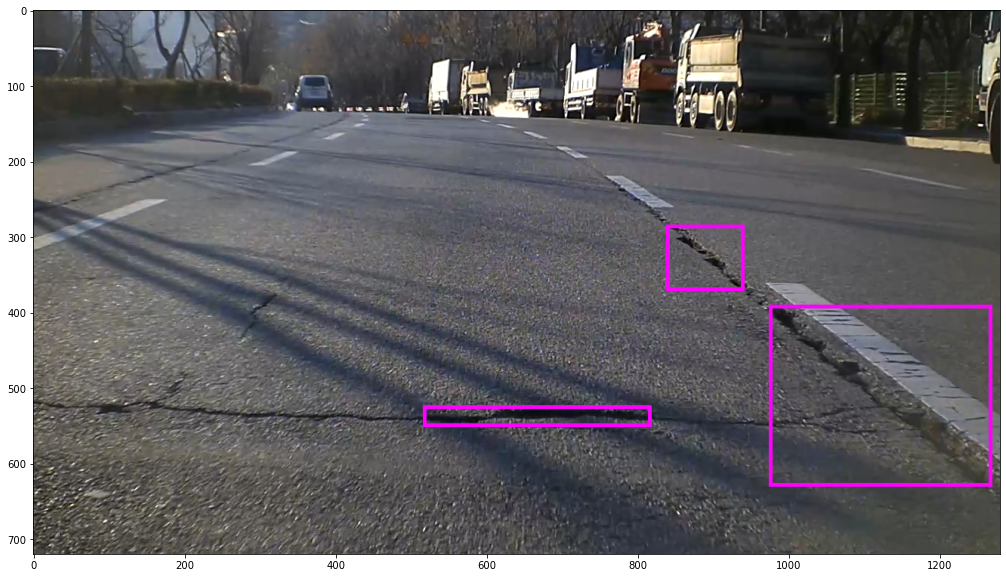

In [146]:
with open(f'{val_annot_path}/{annots[0]}') as f:
    instances = json.load(f)
img_open = Image.open(f'{img_path}/{imgs[0]}').convert("RGBA")

for obj in instances['annotations']:
    bbox1 = [obj["bbox"][0],
            obj["bbox"][1],
            obj["bbox"][0] + obj["bbox"][2],
            obj["bbox"][1] + obj["bbox"][3]]
    print(bbox1)

    # Create layer for bboxes and masks
    # draw_layer = Image.new("RGBA", img_open.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(img_open)
    draw.rectangle(((bbox1[0], bbox1[1], bbox1[2], bbox1[3])), outline=(255, 0, 255), width=5)

plt.figure(figsize=(20,10))
plt.imshow(np.array(img_open))
plt.show()

In [137]:
uni = []
for i, an in enumerate(annots):
    print(f'\r ({i}/{len(annots)})', end='')
    with open(f'{val_annot_path}/{an}') as f:
        instances = json.load(f)
    height = instances['images']['height']
    width = instances['images']['width']
    shape = (height, width)
    if shape not in uni:
        uni.append(shape)
    if shape == (0, 0):
        print(i)
print(uni)

 (1170/2747)1170
 (2746/2747)[(720, 1280), (0, 0)]


In [139]:
with open(f'{val_annot_path}/{annots[1170]}') as f:
    instances = json.load(f)

In [145]:
instances['images']

{'file_name': 'V0F_HY_3840_20210113_111650_E_CH0_Busan_Sun_Mainroad_Day_68770.png',
 'height': 0,
 'width': 0,
 'id': 1}

In [142]:
image = Image.open(f'{img_path}/{imgs[1170]}')

In [144]:
np.array(image).shape

(720, 1280, 3)